## Credit Crad Fraud - Assessing the Data

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


C:\Users\Scott\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.


In [2]:
df = pd.read_csv('creditcard.csv')  #Read Credit Card dataset as dataframe 'df'

In [3]:
df.shape #First look at data: 284807 rows with 31 columns, or features, each.

(284807, 31)

In [4]:
df.head()  #A look at the header of our dataframe.

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
time      284807 non-null int64
v1        284807 non-null float64
v2        284807 non-null float64
v3        284807 non-null float64
v4        284807 non-null float64
v5        284807 non-null float64
v6        284807 non-null float64
v7        284807 non-null float64
v8        284807 non-null float64
v9        284807 non-null float64
v10       284807 non-null float64
v11       284807 non-null float64
v12       284807 non-null float64
v13       284807 non-null float64
v14       284807 non-null float64
v15       284807 non-null float64
v16       284807 non-null float64
v17       284807 non-null float64
v18       284807 non-null float64
v19       284807 non-null float64
v20       284807 non-null float64
v21       284807 non-null float64
v22       284807 non-null float64
v23       284807 non-null float64
v24       284807 non-null float64
v25       284807 non-null float64
v26    

In [6]:
df.sample(10)  # A look at a 10-row sample of our dataset.

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
169269,119605,-0.306088,1.204332,-0.905198,-0.053254,0.437072,-1.330056,0.755161,0.031225,-0.320425,...,0.372716,1.071167,-0.185045,-0.060271,-0.378318,-0.166962,-0.069595,0.022585,34.95,False
269904,163829,0.273173,1.162490,0.288150,2.713414,1.643676,0.112616,1.241352,-0.201371,-1.430053,...,-0.172504,-0.471073,-0.018484,0.385249,-0.180371,-0.284365,-0.225474,-0.267128,2.25,False
82707,59515,1.026880,-0.098610,1.272928,1.166028,-0.845862,0.233703,-0.692380,0.326668,0.267519,...,0.205710,0.547480,0.019935,0.199197,0.182728,-0.362301,0.067217,0.032333,31.50,False
241678,151128,1.956920,0.433559,-2.506301,1.277867,1.330042,-0.350174,0.664914,-0.219434,-0.248767,...,0.013661,0.185481,-0.097942,0.124207,0.529865,-0.518649,-0.005576,-0.029255,39.90,False
579,432,-0.751710,1.198410,1.287421,-0.384763,0.090426,-0.406865,0.556740,-1.979592,-0.517512,...,1.534498,-0.203299,0.037478,0.474355,-0.252582,1.090398,-0.040971,-0.117359,22.03,False
123361,76894,-3.371580,0.428754,0.666313,1.235641,-1.285654,0.419094,-1.850583,2.143370,-0.424053,...,0.307885,0.076770,-0.600165,-0.297125,0.024603,-0.285221,-0.694914,-0.398278,4.89,False
97646,66314,0.995291,-0.784774,0.894992,0.144332,-1.135151,0.151125,-0.671100,0.232811,1.053832,...,-0.149951,-0.467794,-0.055026,0.072173,0.091790,0.936691,-0.061373,0.017171,110.12,False
25927,33829,1.194274,0.167080,0.138416,0.460751,-0.067330,-0.117432,-0.179352,0.167766,-0.036141,...,-0.243501,-0.756214,0.120241,-0.379552,0.118877,0.130935,-0.018101,0.011303,0.89,False
100558,67549,-0.390600,1.058657,1.256909,0.016878,0.185964,-0.512539,0.633861,0.075523,-0.369774,...,-0.236242,-0.591546,0.025947,0.016830,-0.238761,0.102126,0.259506,0.094720,6.99,False
201334,133840,-1.078655,0.317971,-0.165260,-1.707135,2.157558,4.049635,-0.397246,1.339735,0.295284,...,0.219478,0.735555,-0.257317,0.769583,-0.059442,0.612837,-0.040258,-0.126135,43.60,False


In [7]:
df['class'].value_counts()  # A quick summary of the number of true (Credit Card Fraud), 
#and false (Valid transaction) instances in the 'class' column.  The data is overwhelmingly False, with True values 
#accounting for 0.173% of the total dataset.  This is a severely imbalanced dataset
# 

False    284315
True        492
Name: class, dtype: int64

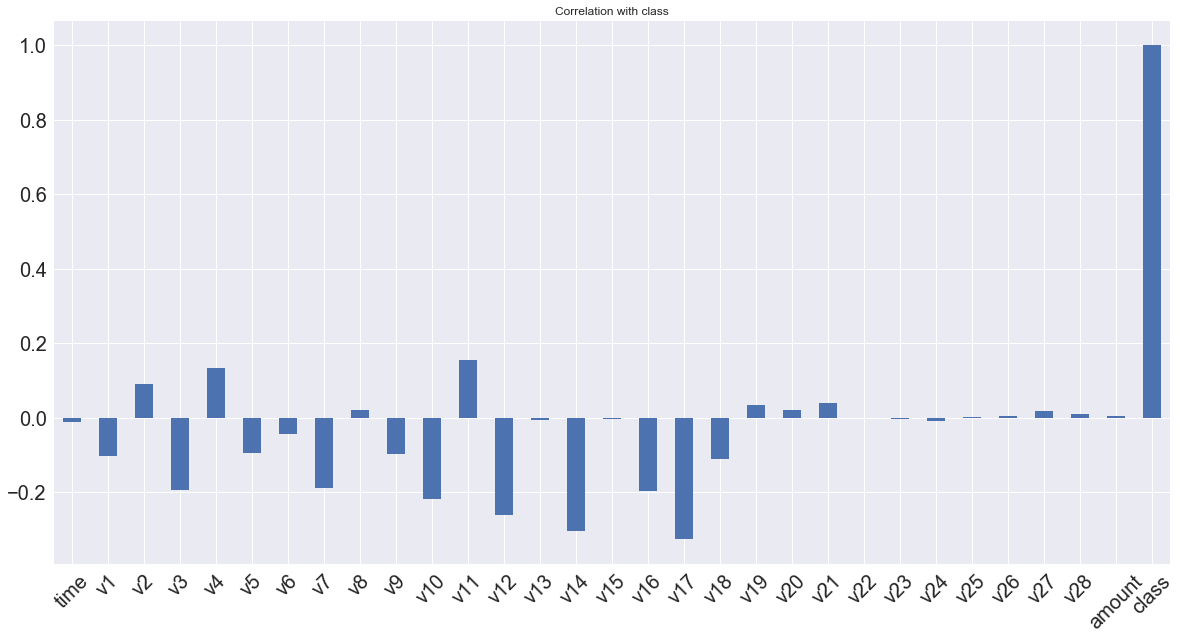

In [8]:
df.corrwith(df['class']).plot.bar(figsize = (20, 10), title = "Correlation with class", fontsize = 20, rot = 45, grid = True)
# Correlating all columns with the 'class' attribute to identify any obvious relationships.

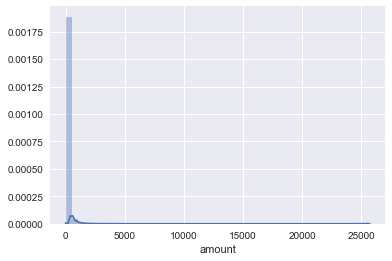

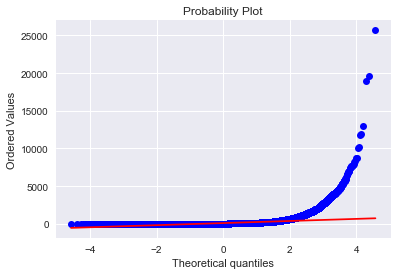

In [9]:
sns.distplot(df['amount'], );
fig = plt.figure()
res = stats.probplot(df['amount'], plot=plt)
#plt.title('Amount vs. Time')

In [10]:
df['amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: amount, dtype: float64

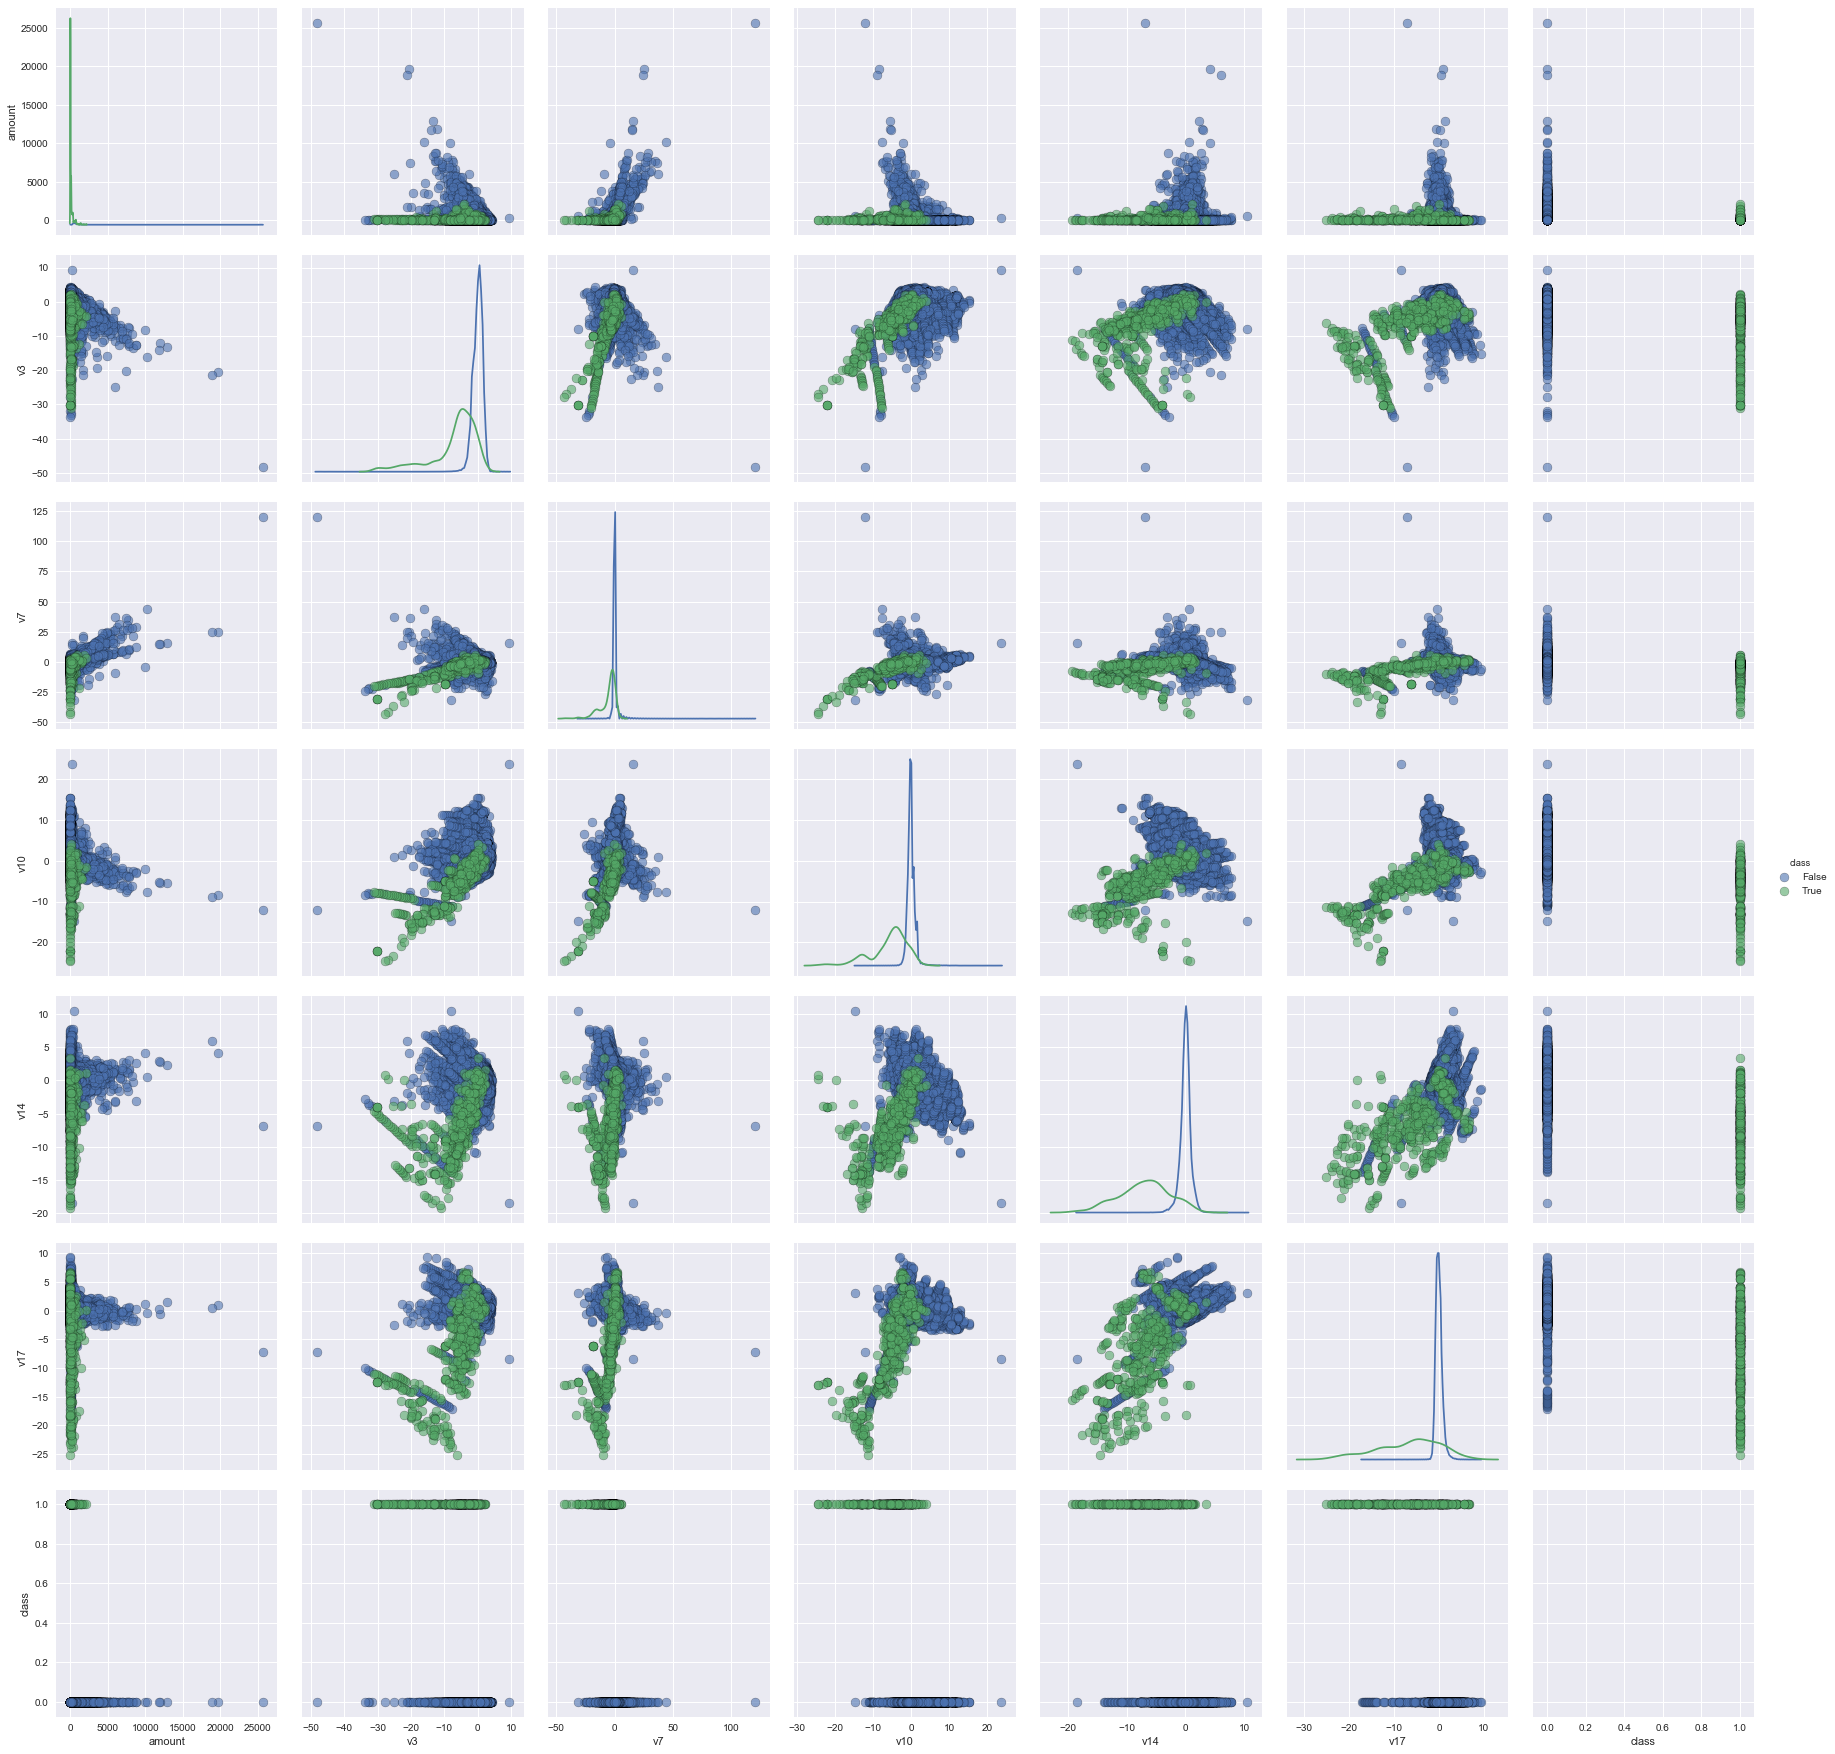

In [11]:
cols = ['amount', 'v3', 'v7', 'v10', 'v14', 'v17', 'class']  # Using the attributes with the strongest correlations to 'class' for a pairs plot.
sns.pairplot(df[cols], hue = 'class', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 3.5)

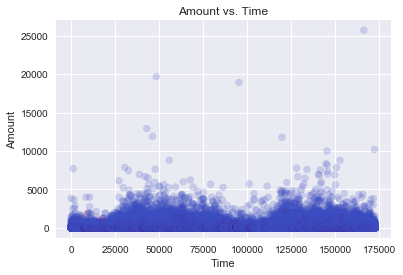

In [12]:
plt.scatter(df['time'],df['amount'], c=df['class'], cmap='coolwarm',alpha = 0.2)# A scatterplot of Amount vs time suggesting a 
# degree of cyclicity to transaction activity.
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Amount vs. Time')

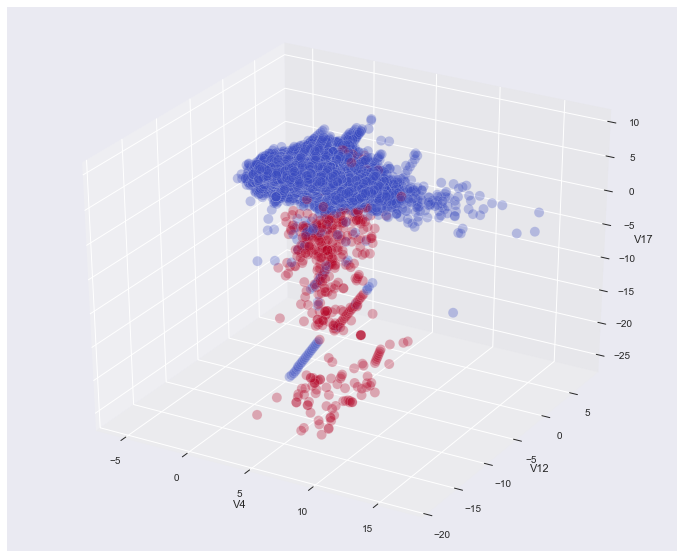

In [13]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['v4']
ys = df['v12']
zs = df['v17']

ax.scatter(xs, ys, zs, c=df['class'], cmap = 'coolwarm' ,s=100, alpha=0.3, edgecolors='w')

ax.set_xlabel('V4')
ax.set_ylabel('V12')
ax.set_zlabel('V17')

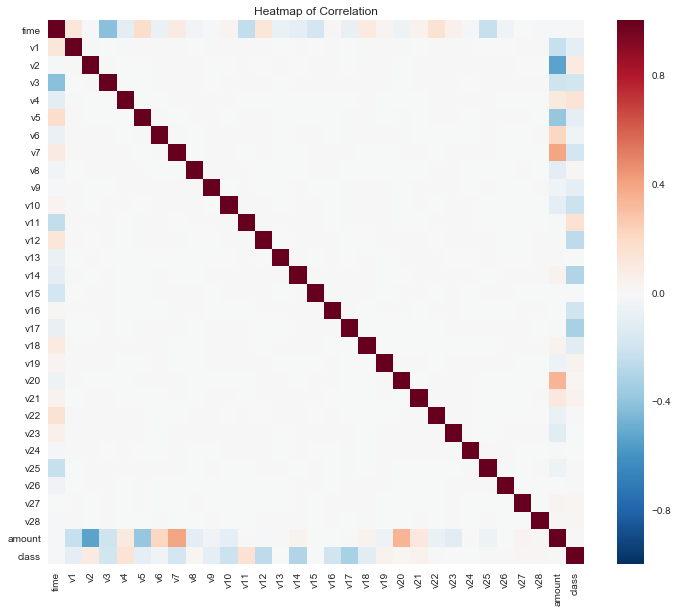

In [14]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

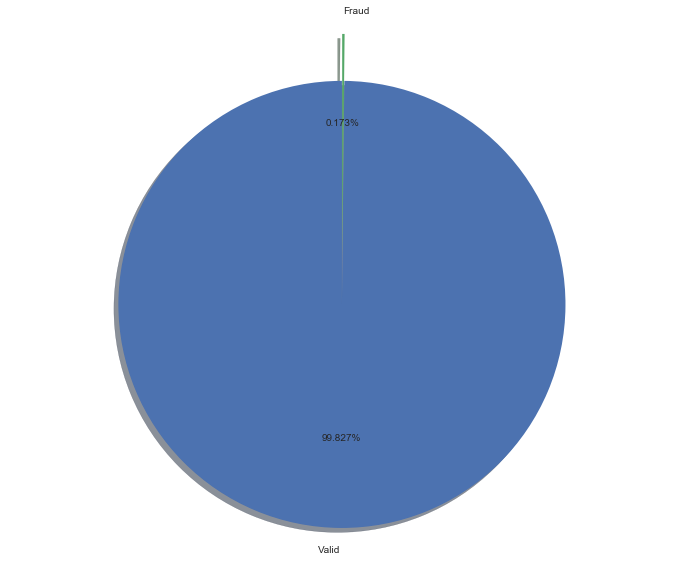

In [15]:
labels = 'Valid', 'Fraud'  #A pie chart showing the instances of fraud relative to the valid transaction instances.
sizes = [284315, 492]
explode = (0, 0.21)   

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## Credit Card Fraud - Correcting The Imbalanced Dataset

In [16]:
from sklearn.preprocessing import StandardScaler  #import scaling routine
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [17]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [18]:
#concatenating newly created columns w original df
dfr = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
dfr.sample(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,scaled_amount,scaled_time
261968,160260,1.759968,-1.501703,-1.747914,-0.689787,-0.880491,-1.490108,0.079019,-0.416335,-0.414162,...,0.015150,-0.068067,-0.216315,-0.332262,-0.107709,-0.024258,259.00,False,0.682275,1.378160
205958,135997,2.002249,-0.355295,-0.457339,0.304443,-0.395107,-0.049674,-0.626755,0.020967,1.490816,...,0.089346,0.642931,0.077655,-0.496754,0.070914,-0.028280,0.76,False,-0.350191,0.867231
186962,127327,1.827103,-0.733221,-2.794317,-0.586599,0.229899,-1.988898,1.105369,-0.679175,0.584866,...,-0.329068,0.023096,0.505083,1.064278,-0.190445,-0.073075,190.00,False,0.406407,0.684659
233895,147745,-0.506136,1.068087,0.178536,-0.979252,1.156749,-0.891046,1.558262,-0.223720,-1.021955,...,-0.713562,-0.363726,1.118430,0.456511,-0.054958,0.009810,3.78,False,-0.338117,1.114620
6224,7276,1.053342,-0.297935,0.430505,1.063365,-0.494264,-0.202269,-0.164818,-0.126355,2.048904,...,-0.210682,-0.157338,0.536365,0.396154,-0.066066,0.017821,115.00,False,0.106551,-1.843366
271343,164531,-0.677845,0.958432,1.134424,-0.293979,-0.492275,-0.357410,-0.090673,0.515767,0.475281,...,-0.232666,-0.082791,-0.169990,-0.143496,0.323162,0.170638,1.00,False,-0.349231,1.468098
18349,29413,-1.047164,-1.706445,2.153737,-1.159646,0.049299,-1.177221,-0.788162,-0.083781,-0.357474,...,0.211298,0.431071,-0.093637,-0.282614,-0.140386,-0.131692,88.00,False,-0.001398,-1.377206
193574,130195,-1.406586,-0.836626,1.435818,-0.304545,0.762230,0.015770,0.417296,0.078173,0.130524,...,0.299169,0.713263,0.105368,-0.220959,0.137271,0.011488,190.58,False,0.408726,0.745053
141497,84358,0.824501,-1.248116,0.388537,-0.009602,-0.748586,1.096340,-0.719647,0.466153,1.277469,...,-0.199279,-1.114925,0.054057,1.012467,-0.071834,0.019304,206.00,False,0.470376,-0.220179
252402,155791,2.032672,-0.072052,-0.887861,0.455564,-0.225738,-1.064710,0.057764,-0.321918,0.813436,...,0.149307,0.072735,0.033818,-0.345504,0.007594,-0.046753,4.81,False,-0.333999,1.284052


In [19]:
#dropping old amount and time columns
dfr.drop(['amount', 'time'], axis=1, inplace=True)
dfr.sample(10)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v22,v23,v24,v25,v26,v27,v28,class,scaled_amount,scaled_time
147413,2.130927,0.216296,-2.436700,0.107056,0.754114,-1.879689,1.135955,-0.772232,-0.044924,-0.008332,...,1.104475,-0.237251,0.105755,0.795187,0.457151,-0.097928,-0.086385,False,-0.283263,-0.132515
198858,-0.025888,-0.376683,1.960893,-1.346001,-1.001912,0.728626,-1.055108,0.441674,-0.584039,0.376691,...,1.686103,-0.055986,0.744086,-0.894239,-0.033338,0.249147,0.202485,False,-0.289300,0.797424
12030,-5.373899,5.537306,-10.451813,5.831008,-5.209512,-3.658238,-9.526906,3.996788,-3.224948,-10.752207,...,-0.446762,-0.080766,-0.019581,0.104116,-0.304290,1.954876,0.686027,False,-0.349231,-1.558094
77110,-1.596422,0.056669,1.472911,-0.129960,-0.322419,-0.932457,-0.141720,0.551792,0.143824,-0.871784,...,0.490586,-0.062618,0.438712,0.001198,0.440543,0.188075,0.007056,False,-0.100350,-0.798535
260016,2.016001,-1.309625,-0.188514,-1.356335,-0.463853,2.098042,-1.954563,0.702407,0.148826,0.728248,...,1.678447,0.218144,-0.891986,-0.544430,-0.026607,0.097965,-0.050329,False,-0.323244,1.359376
149693,-0.271356,1.432814,0.231012,-0.462821,1.036005,-1.051812,1.617786,-1.051044,2.103649,0.866002,...,1.286596,-0.215614,-0.014333,-0.716162,-0.331366,0.319061,-0.170842,False,-0.346073,-0.064582
259434,0.156194,0.852623,-0.797128,-0.859242,1.326569,-0.024682,0.752728,0.169122,-0.050367,-0.624789,...,-0.998337,-0.014323,-0.436078,-0.369147,0.156675,0.208552,0.062373,False,-0.342475,1.354027
158830,2.011759,0.066220,-1.619709,0.340822,0.369530,-0.586965,0.033428,-0.043543,0.304033,-0.201530,...,-0.820402,0.363434,0.595149,-0.345445,0.150183,-0.066562,-0.040697,False,-0.349271,0.358198
206137,2.043372,-0.134580,-1.184791,0.228439,0.036093,-0.715741,0.047394,-0.145162,0.362589,0.254441,...,-0.676769,0.293719,-0.346656,-0.298635,0.199689,-0.077335,-0.074346,False,-0.349671,0.869021
276843,-1.252346,0.774228,0.970043,-0.928450,0.923117,0.491288,0.842593,0.203734,-0.372187,-0.273954,...,-0.111332,-0.340093,0.064764,0.814638,0.376941,0.343142,0.192398,False,-0.093554,1.526997


In [20]:
# separating the fraud and valid transaction entries into two dataframes
dfraud = dfr[dfr['class']==1]  
dvalid = dfr[dfr['class']==0]
dfraud.shape, dvalid.shape

((492, 31), (284315, 31))

In [21]:
# extracting a random subsample of 20000 valid transactions
dvalidsubsample = dvalid.sample(20000)
dvalidsubsample.shape

(20000, 31)

In [22]:
df2 = pd.concat([dfraud, dvalidsubsample]) #concatenating the valid subsample and fraud dataframes
df2=df2.reset_index(drop=True)  #reseting the dataframe index
df2.reindex(np.random.permutation(df2.index)) #shuffling the dataframe to randomize the valid and fraud instances
df2.shape

(20492, 31)

In [23]:
df2['class'].value_counts()  # checking on the numbers of fraud and vaild instances in the new dataframe

False    20000
True       492
Name: class, dtype: int64

In [24]:
df2['class'].sum(), (len(df2['class'])- df2['class'].sum())

(492, 20000)

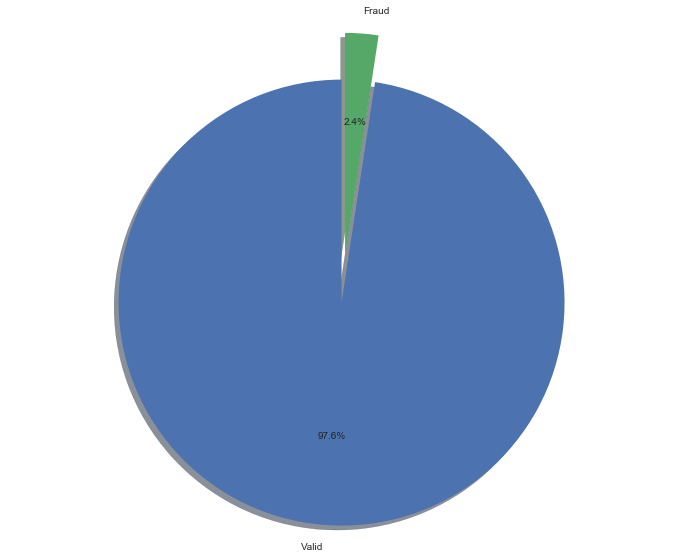

In [25]:
#Updated pie chart reflecting the new relative proportions of fraud and valid instances in the resampled subset.
labels = 'Valid', 'Fraud'
sizes = [(len(df2['class'])- df2['class'].sum()), df2['class'].sum()]
explode = (0, 0.21)  # 

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [26]:
from sklearn.manifold import TSNE

X = df2.drop('class', axis=1)
y = df2['class']
X.shape


(20492, 30)

In [27]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(X.values)
X_reduced_tsne.shape

(20492, 2)

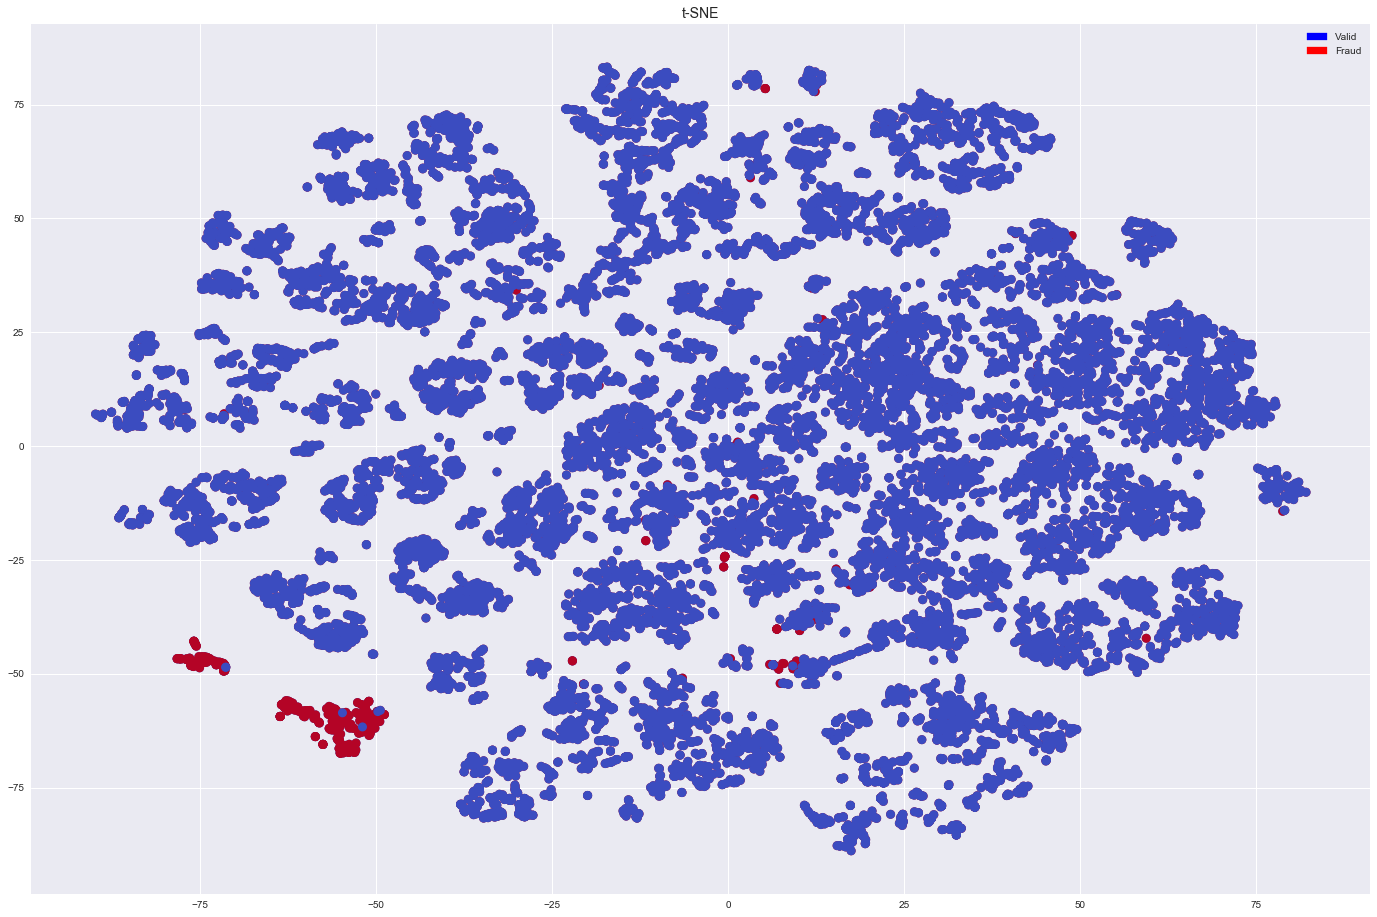

In [28]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='Blue', label='Valid')
red_patch = mpatches.Patch(color='Red', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Valid', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [29]:
from imblearn.over_sampling import SMOTE



In [30]:
# Perform the Test-Train split of dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
len(y_train)- y_train.sum()

15011

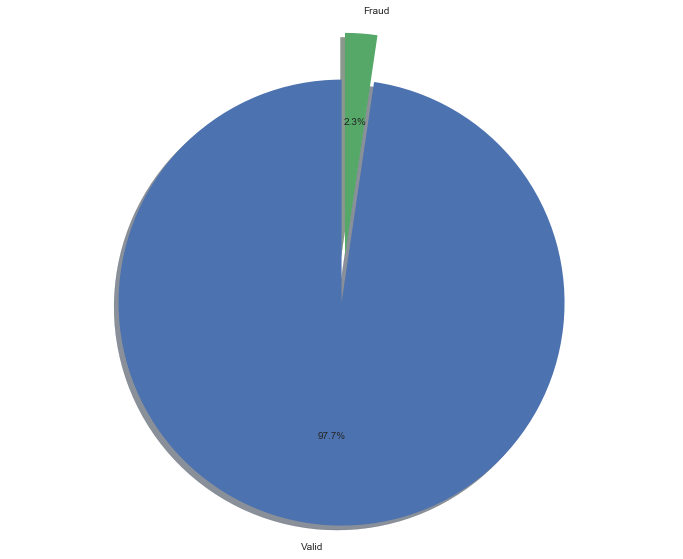

In [32]:
labels = 'Valid', 'Fraud'
sizes = [(len(y_train)- y_train.sum()), y_train.sum()]
explode = (0, 0.21)  # 

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [33]:
smt = SMOTE()#generate synthetic samples of instances of Fraud via SMOTE
X_train, y_train = smt.fit_sample(X_train, y_train)


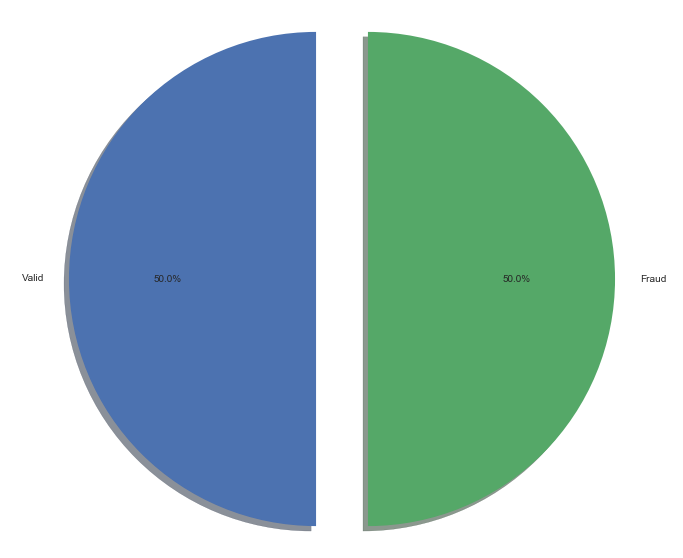

In [34]:
labels = 'Valid', 'Fraud'
sizes = [(len(y_train)- y_train.sum()), y_train.sum()]
explode = (0, 0.21)  # 

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [35]:
X_train.shape

(30022, 30)

In [36]:
#t-SNE
from sklearn.manifold import TSNE
X_reduced_tsne2 = TSNE(n_components=2, random_state=0).fit_transform(X_train)
X_reduced_tsne2.shape
#print (X_reduced_tsne2)

(30022, 2)

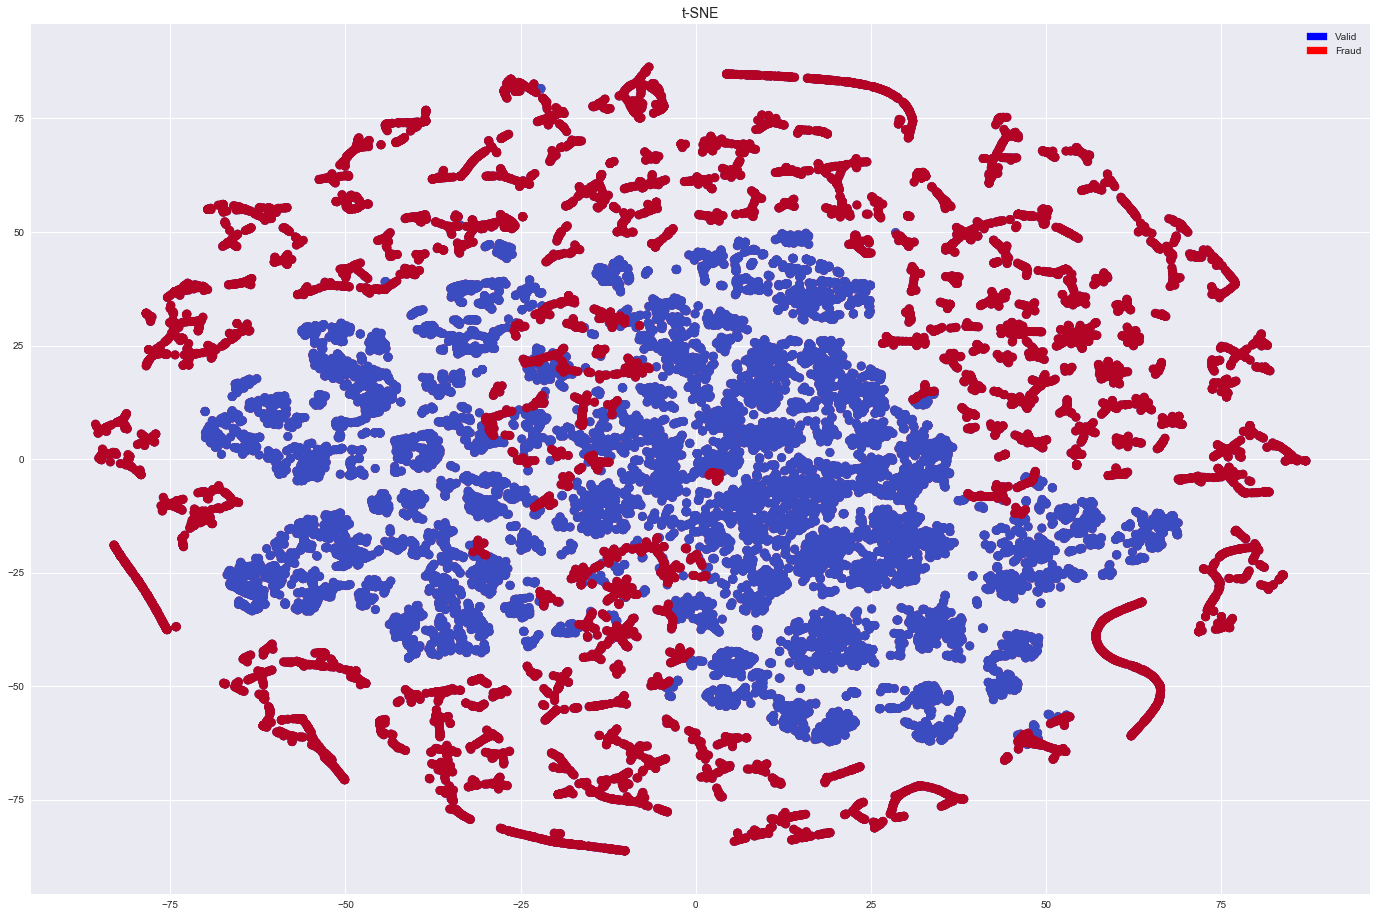

In [37]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='Blue', label='Valid')
red_patch = mpatches.Patch(color='Red', label='Fraud')

ax.scatter(X_reduced_tsne2[:,0], X_reduced_tsne2[:,1], c=(y_train == 0), cmap='coolwarm', label='Valid', linewidths=2)
ax.scatter(X_reduced_tsne2[:,0], X_reduced_tsne2[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

# Credit Card Fraud - The Balanced Dataset: Analysis

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve 

In [39]:
def plot_roc_curve(fpr, tpr):  # create AUC-ROC plotting code, to be called on later
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [40]:

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))



AUC : 0.988 LR
AUC : 0.971 LDA
AUC : 0.943 KNN
AUC : 0.914 CART
AUC : 0.964 RF


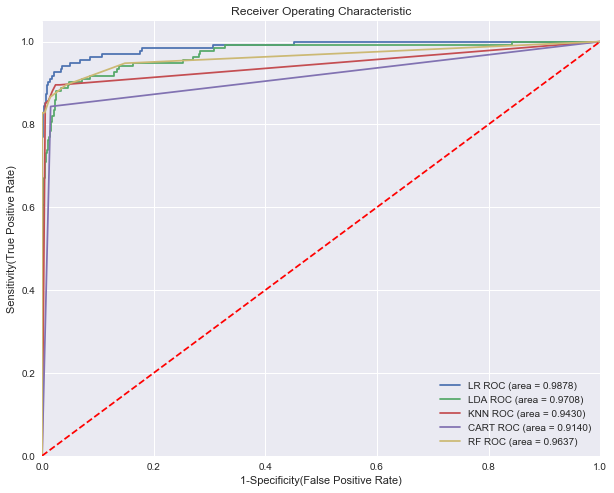

In [46]:
#MODEL_NAME, MODEL, AUC, RMSE, fpr, tpr, thresholds 
kingpin=[]
cmatrix=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]  
    fpr, tpr, thresholds = roc_curve(y_test, probs)  
    auc = roc_auc_score(y_test, probs) 
    print('AUC '': %.3f' % auc, name)
#    mae = metrics.mean_absolute_error(y_test, y_pred)
#    mse = metrics.mean_squared_error(y_test, y_pred)
#    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    matrix = confusion_matrix(y_test, y_pred)
    class_names = ['Valid', 'Fraud']
# Create pandas dataframe
    holder = (name, matrix)
    cmatrix.append(holder)
    holder = None
    
#    sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
#    plt.title("Confusion Matrix"), plt.tight_layout()
#    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
#    plt.show()

    
    temp=(name,model,auc,fpr, tpr, thresholds)
    kingpin.append(temp)
    temp=None
    plt.plot(fpr, tpr, label='%s ROC (area = %0.4f)' % (name, auc))
    plt.rcParams["figure.figsize"] = [25,16]
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
plt.rcParams["figure.figsize"] = [10,8]

In [42]:
print(cmatrix)


[('LR', array([[4867,  122],
       [  10,  124]], dtype=int64)), ('LDA', array([[4914,   75],
       [  29,  105]], dtype=int64)), ('KNN', array([[4897,   92],
       [  16,  118]], dtype=int64)), ('CART', array([[4909,   80],
       [  20,  114]], dtype=int64)), ('RF', array([[4983,    6],
       [  21,  113]], dtype=int64))]


In [43]:
#for name, matrix in cmatrix:
#    sns.heatmap(cmatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
#    plt.title(name), plt.tight_layout()
#    plt.ylabel("Confusion Matrix: True Class"), plt.xlabel("Confusion Matric: Predicted Class")
#    plt.rcParams["figure.figsize"] = [10,8]
#    plt.show()

In [44]:
print("Evaluation:")
print()
for i in kingpin:
    print("Model Name: ", i[0])
    print("AUC: ", i[2])
#    print("MAE: ", i[3])
#    print("MSE: ", i[4])
#    print("RMSE: ", i[5])
    print()
    print("-------------------------")
    print()
#    print("FPR: ", i[3])
#    print("TPR: ", i[4])
#    print("Thresholds: ", i[5])
    #MODEL_NAME, MODEL, AUC, MAE, MSE, RMSE, fpr, tpr, thresholds 

Evaluation:

Model Name:  LR
AUC:  0.9878314381190858

-------------------------

Model Name:  LDA
AUC:  0.9707625432668289

-------------------------

Model Name:  KNN
AUC:  0.9430014689032289

-------------------------

Model Name:  CART
AUC:  0.9173554955229863

-------------------------

Model Name:  RF
AUC:  0.9710557255813536

-------------------------



In [45]:
#for name in cmatrix:
    # Create heatmap
#    sns.heatmap(cmatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
#    plt.title("Confusion Matrix: ", name ), plt.tight_layout()
#    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
#    plt.show()
print(cmatrix)

[('LR', array([[4867,  122],
       [  10,  124]], dtype=int64)), ('LDA', array([[4914,   75],
       [  29,  105]], dtype=int64)), ('KNN', array([[4897,   92],
       [  16,  118]], dtype=int64)), ('CART', array([[4909,   80],
       [  20,  114]], dtype=int64)), ('RF', array([[4983,    6],
       [  21,  113]], dtype=int64))]
